# Regresión lineal simple en Python

In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('../datasets/Advertising.csv')

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Se intentará buscar una relación lineal entre el gasto de TV y las ventas.

## Regresión lineal simple

## Paquete statsmodel

In [6]:
import statsmodels.formula.api as smf

Se define ventas (la variable predictora) en función de únicamente la televisión.

fit() sirve para calcular la recta que mejor se ajusta utilizando la técnica de minimizar la suma de los cuadrados de los errores

In [7]:
# Se manda como argumento la fórmula que se quiere llevar a cabo y el nombre del dataset
lm = smf.ols(formula='Sales~TV', data = data).fit()

El intercept es la 'a' de nuestro modelo lineal y el parámetro que acompañaría a TV  

In [8]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería
sales = 7.032594 + 0.047537 * TV 

In [9]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Los p valores son demasiado pequeños, podemos garantizar de que el parámetro no es 0 ni para el corte con la ordenada en el origen ni para el parámetro que acompaña al dinero gastado en TV.

Hay otro indicador importante del modelo que es la eficacia del modelo presente en el factor R**2 (la suma de los cuadrados totales).

In [10]:
lm.rsquared

0.611875050850071

Existe una variante entre que es el valor de R**2 ajustado, que se supone que va un poco mejor. Tiende a ser una modificación de un pequeño factor en función del número de elementos que se están estudiando.

In [11]:
lm.rsquared_adj

0.6099148238341623

Visión general del modelo

In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        14:54:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
sales_pred = lm.predict(pd.DataFrame(data['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

Se calculó la predicción de ventas para cada una de las filas basándonos en la ecuación que utiliza únicamente los costos de TV.

Podríamos hacer un plot de esta predicción vs los costos reales y mirar si la línea de tendencia se ajusta o no al valor de la predicción.

In [14]:
import matplotlib.pyplot as plt
import numpy as np

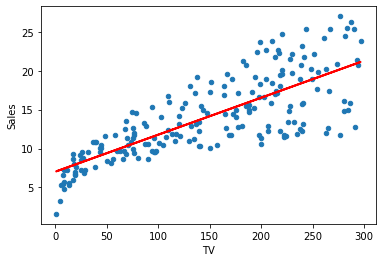

In [15]:
%matplotlib inline
data.plot(kind ='scatter', x='TV', y='Sales')
plt.plot(pd.DataFrame(data['TV']), sales_pred, c='red', linewidth=2)